# Retail Giant Sales Forecasting

## Step-1: Data Preparation
                
                1) Reading the data
                2) Calculation COV (Coefficient Of Variation)

## Step-2: Build and evaluate time series forecast
                1) Time series Decomposition
                            a) Additive seasonal decomposition
                            b) Multiplicative seasonal decomposition
                2) Exponential smoothing methods
                            a) Simple exponential smoothing
                            b) Holt's method with trend:
                            c) Holt Winters' additive method with trend and seasonality
                            d) Holt Winter's multiplicative method with trend and seasonality
                3) Auto Regressive methods
                            a) Stationary tests
                            b) Conversion of Non-Stationary to Stationary
                            c) Auto regression method (AR)
                            d) Moving average method (MA)
                            e) Auto regression moving average method (ARMA)
                            f) Auto regressive integrated moving average (ARIMA)
                            g) Seasonal auto regressive integrated moving average (SARIMA)                                     
                4) Conclusion

## Step-1: Data Preparation

## 1. Reading the data

### Import required packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Import time series data: Global Superstore

In [2]:
ss_data = pd.read_csv("Global+Superstore+Data.csv")
ss_data.head(20)

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200
5,28-06-2013,Corporate,APAC,2862.675,763.2750
6,07-11-2011,Consumer,APAC,1822.080,564.8400
7,14-04-2012,Consumer,APAC,5244.840,996.4800
8,14-10-2014,Corporate,US,5083.960,1906.4850
9,28-01-2012,Consumer,US,4297.644,-1862.3124


In [3]:
ss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [4]:
# Check for missing values

ss_data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

#### There are no missing values in the Super-store dataset.

In [5]:
# Converting the date format into year-month

ss_data['Order Date'] = pd.to_datetime(ss_data['Order Date']).dt.to_period('m')

ss_data.sort_values(by = 'Order Date',inplace = True)

In [6]:
ss_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 15262 to 541
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  51290 non-null  period[M]
 1   Segment     51290 non-null  object   
 2   Market      51290 non-null  object   
 3   Sales       51290 non-null  float64  
 4   Profit      51290 non-null  float64  
dtypes: float64(2), object(2), period[M](1)
memory usage: 2.3+ MB


In [7]:
# Creating the Market_Segment column by concatinating both Market and Segment columns

ss_data["Market_Segment"] = ss_data["Segment"]+"_"+ss_data["Market"]
ss_data

,Order Date,Segment,Market,Sales,Profit,Market_Segment
15262,2011-01,Corporate,EU,139.6500,15.3000,Corporate_EU
26744,2011-01,Consumer,EU,88.4400,15.8400,Consumer_EU
48614,2011-01,Corporate,EU,11.4300,4.1100,Corporate_EU
9417,2011-01,Consumer,LATAM,491.0000,122.7000,Consumer_LATAM
48590,2011-01,Home Office,US,4.7100,0.0000,Home Office_US
...,...,...,...,...,...,...
26850,2014-12,Corporate,EMEA,42.9600,5.0400,Corporate_EMEA
19243,2014-12,Consumer,EMEA,80.7360,-117.1440,Consumer_EMEA
7829,2014-12,Consumer,APAC,608.5800,0.0000,Consumer_APAC
21163,2014-12,Consumer,APAC,185.0688,-102.8712,Consumer_APAC


## 2. Calculating COV(Coefficient Of Variation)

### Split time series data into training and test set

In [8]:
df = pd.pivot_table(ss_data,index = 'Order Date',values = 'Profit',columns = 'Market_Segment',aggfunc = 'sum')
df.head(10)

Market_Segment,Consumer_APAC,Consumer_Africa,Consumer_Canada,Consumer_EMEA,Consumer_EU,Consumer_LATAM,Consumer_US,Corporate_APAC,Corporate_Africa,Corporate_Canada,...,Corporate_EU,Corporate_LATAM,Corporate_US,Home Office_APAC,Home Office_Africa,Home Office_Canada,Home Office_EMEA,Home Office_EU,Home Office_LATAM,Home Office_US
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,265.539,447.33,-2952.594,2259.8670,540.44312,2465.8368,-173.7264,520.026,12.57,...,841.3875,1021.05924,643.3689,230.2656,391.515,NaN,392.526,2534.5680,-26.59744,1233.9329
2011-02,4627.8531,-201.888,26.43,464.160,-783.9945,1227.86616,1853.5541,3600.7776,-31.689,9.24,...,2234.4060,814.03020,421.9256,617.5407,825.606,87.99,368.070,162.2550,-356.80440,553.9467
2011-03,2337.8319,919.074,82.47,706.380,1273.7100,2427.39612,204.2007,3634.9365,244.437,NaN,...,2206.5960,178.66400,127.4696,205.1052,83.430,84.03,-15.570,269.7450,769.88400,-268.9314
2011-04,633.6423,381.315,55.08,121.353,2980.0065,1368.82948,1434.8636,90.7521,941.751,6.51,...,981.1470,872.64068,494.7315,603.8478,417.618,NaN,-456.510,130.3710,-554.22952,2723.4358
2011-05,3838.9500,-39.981,0.87,172.554,673.0080,1749.39200,833.9433,1028.4489,490.650,NaN,...,1719.0600,134.87252,2912.7976,102.0315,39.180,NaN,-33.591,443.3100,-397.95600,145.7781
2011-06,5231.0316,-929.148,7.50,745.518,4135.4460,-115.27088,2414.4710,4550.5506,-400.917,40.08,...,2214.9660,3248.31820,447.1375,264.6204,-727.611,23.40,551.208,1580.4495,324.38564,208.4844
2011-07,1928.5449,787.158,NaN,-333.285,602.7330,2344.33328,-2620.8365,2322.9585,105.597,509.19,...,1394.9100,-186.83332,648.1498,3261.9522,-318.942,8.40,-2114.334,463.4070,298.97200,1636.2932
2011-08,1101.5235,-387.558,23.88,1344.744,2264.9640,2270.28272,-548.0292,3137.2923,-712.866,NaN,...,4390.4490,317.83228,1910.2192,2187.2787,1999.050,NaN,-218.802,350.1180,660.28524,700.9315
2011-09,3088.9449,274.701,181.29,61.575,6129.7185,1737.60452,9813.4142,2040.2007,832.434,52.14,...,2704.1565,-523.86568,-262.5736,1221.6693,239.550,18.06,582.318,2891.2710,696.95344,676.0368


In [9]:
train_len = 42
train1 = df[0:train_len] # first 42 months as training set
test1 = df[train_len:] # last 6 months as out-of-time test set

In [10]:
train1.shape

(42, 21)

In [11]:
test1.shape

(6, 21)

In [12]:
train1.head()

Market_Segment,Consumer_APAC,Consumer_Africa,Consumer_Canada,Consumer_EMEA,Consumer_EU,Consumer_LATAM,Consumer_US,Corporate_APAC,Corporate_Africa,Corporate_Canada,...,Corporate_EU,Corporate_LATAM,Corporate_US,Home Office_APAC,Home Office_Africa,Home Office_Canada,Home Office_EMEA,Home Office_EU,Home Office_LATAM,Home Office_US
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,265.539,447.33,-2952.594,2259.8670,540.44312,2465.8368,-173.7264,520.026,12.57,...,841.3875,1021.05924,643.3689,230.2656,391.515,NaN,392.526,2534.568,-26.59744,1233.9329
2011-02,4627.8531,-201.888,26.43,464.160,-783.9945,1227.86616,1853.5541,3600.7776,-31.689,9.24,...,2234.4060,814.03020,421.9256,617.5407,825.606,87.99,368.070,162.255,-356.80440,553.9467
2011-03,2337.8319,919.074,82.47,706.380,1273.7100,2427.39612,204.2007,3634.9365,244.437,NaN,...,2206.5960,178.66400,127.4696,205.1052,83.430,84.03,-15.570,269.745,769.88400,-268.9314
2011-04,633.6423,381.315,55.08,121.353,2980.0065,1368.82948,1434.8636,90.7521,941.751,6.51,...,981.1470,872.64068,494.7315,603.8478,417.618,NaN,-456.510,130.371,-554.22952,2723.4358
2011-05,3838.9500,-39.981,0.87,172.554,673.0080,1749.39200,833.9433,1028.4489,490.650,NaN,...,1719.0600,134.87252,2912.7976,102.0315,39.180,NaN,-33.591,443.310,-397.95600,145.7781


In [13]:
test1.head()

Market_Segment,Consumer_APAC,Consumer_Africa,Consumer_Canada,Consumer_EMEA,Consumer_EU,Consumer_LATAM,Consumer_US,Corporate_APAC,Corporate_Africa,Corporate_Canada,...,Corporate_EU,Corporate_LATAM,Corporate_US,Home Office_APAC,Home Office_Africa,Home Office_Canada,Home Office_EMEA,Home Office_EU,Home Office_LATAM,Home Office_US
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-07,1415.0049,472.287,NaN,463.194,4224.1095,126.17668,1171.6925,3330.4251,389.322,65.10,...,3842.6700,1333.21772,2941.9503,2642.6874,795.960,10.80,1530.378,-1625.1780,1443.44916,1587.7943
2014-08,4405.5609,1848.834,617.01,1485.804,7316.4210,5135.04420,2806.9233,1623.9069,112.041,58.95,...,8370.2250,489.52444,3284.5880,1059.0081,1717.773,110.22,423.114,1471.8645,1142.49640,1168.9436
2014-09,4342.6419,2915.433,25.20,2444.796,5405.8485,4382.15812,4401.4550,4419.9804,350.439,128.04,...,4341.1080,1914.78796,5156.8145,7389.1881,499.089,63.48,-471.552,880.9695,1428.99836,2788.8755
2014-10,7997.8092,745.929,3.30,2005.428,6641.0205,4068.74672,2515.7175,4371.8221,2501.847,390.51,...,4256.6745,2687.02280,2505.4306,4151.0742,-1130.139,NaN,337.764,1480.4205,2149.39528,4104.2505
2014-11,13773.4995,1689.360,236.13,432.399,1635.9270,4208.42260,5981.7104,5588.2947,-381.669,104.13,...,5266.0665,1813.60880,2812.3922,3526.9944,2001.189,86.64,837.063,3157.5615,1342.24256,493.4159


In [14]:
# Calculating COV for the "Profit" column

cov_data = pd.DataFrame(train1.mean())
cov_data = cov_data.rename(columns={0 : 'Profit_mean'})
cov_data['Profit_std'] = np.std(train1)
cov_data['COV'] = np.std(train1)/train1.mean()
cov_data.sort_values(by ='COV')

,Profit_mean,Profit_std,COV
Market_Segment,,,
Consumer_APAC,4400.894243,2300.457687,0.522725
Corporate_APAC,2574.919807,1364.837734,0.530051
Consumer_EU,3699.977143,2202.282289,0.595215
Consumer_LATAM,2295.555697,1569.632686,0.683770
Corporate_EU,2216.299429,1600.336696,0.722076
Corporate_LATAM,1122.633016,990.360880,0.882177
Home Office_EU,1224.456536,1148.627937,0.938072
Home Office_APAC,1511.088314,1523.508658,1.008219
Consumer_US,2686.740912,2715.031412,1.010530


Lower the COV value higher the profit of the segment.

Hence "Consumer_APAC" is the Most Profitable segment with COV value 0.522725.

## Step-2: Build and evaluate time series forecast

In [15]:
ss_data

,Order Date,Segment,Market,Sales,Profit,Market_Segment
15262,2011-01,Corporate,EU,139.6500,15.3000,Corporate_EU
26744,2011-01,Consumer,EU,88.4400,15.8400,Consumer_EU
48614,2011-01,Corporate,EU,11.4300,4.1100,Corporate_EU
9417,2011-01,Consumer,LATAM,491.0000,122.7000,Consumer_LATAM
48590,2011-01,Home Office,US,4.7100,0.0000,Home Office_US
...,...,...,...,...,...,...
26850,2014-12,Corporate,EMEA,42.9600,5.0400,Corporate_EMEA
19243,2014-12,Consumer,EMEA,80.7360,-117.1440,Consumer_EMEA
7829,2014-12,Consumer,APAC,608.5800,0.0000,Consumer_APAC
21163,2014-12,Consumer,APAC,185.0688,-102.8712,Consumer_APAC


In [16]:
# Extracting the most profitable segment i.e "Consumer_APAC"

ss_data1 = ss_data[ss_data.Market_Segment == "Consumer_APAC"]

In [17]:
ss_data1

,Order Date,Segment,Market,Sales,Profit,Market_Segment
1080,2011-01,Consumer,APAC,1429.0500,371.4900,Consumer_APAC
9203,2011-01,Consumer,APAC,219.7800,59.3400,Consumer_APAC
19331,2011-01,Consumer,APAC,342.5100,54.6000,Consumer_APAC
26270,2011-01,Consumer,APAC,102.7620,1.8420,Consumer_APAC
14830,2011-01,Consumer,APAC,420.4200,147.0000,Consumer_APAC
...,...,...,...,...,...,...
11002,2014-12,Consumer,APAC,243.6840,-89.3760,Consumer_APAC
42899,2014-12,Consumer,APAC,39.0000,7.3800,Consumer_APAC
30816,2014-12,Consumer,APAC,100.4964,-12.1836,Consumer_APAC
7829,2014-12,Consumer,APAC,608.5800,0.0000,Consumer_APAC


In [18]:
# Converting "Order Date" to Timestamp for furthur forecasting

ss_data['Order Date'] = ss_data["Order Date"].values.astype('datetime64[M]')

In [19]:
ss_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 15262 to 541
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      51290 non-null  datetime64[ns]
 1   Segment         51290 non-null  object        
 2   Market          51290 non-null  object        
 3   Sales           51290 non-null  float64       
 4   Profit          51290 non-null  float64       
 5   Market_Segment  51290 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 2.7+ MB


In [20]:
# Grouping the Data by "Order Date" and aggregating on sum of "Sales"

ss_data1 = ss_data.groupby('Order Date').agg({'Sales': 'sum'})

In [21]:
ss_data1.head()

,Sales
Order Date,
2011-01-01,138241.30042
2011-02-01,134969.94086
2011-03-01,171455.59372
2011-04-01,128833.47034
2011-05-01,148146.72092


In [22]:
ss_data1.shape

(48, 1)

### Plot time series data

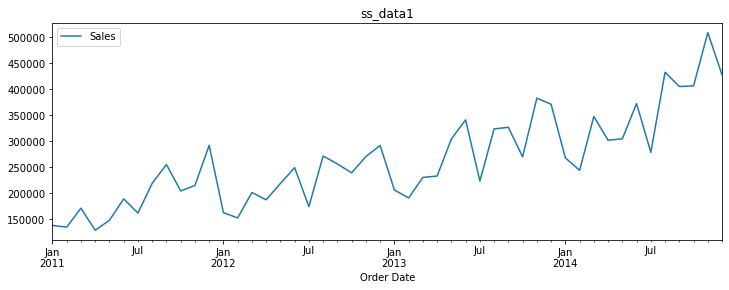

In [23]:
ss_data1.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('ss_data1')
plt.show(block=False)

### 1) Time series Decomposition

### a) Additive seasonal decomposition:

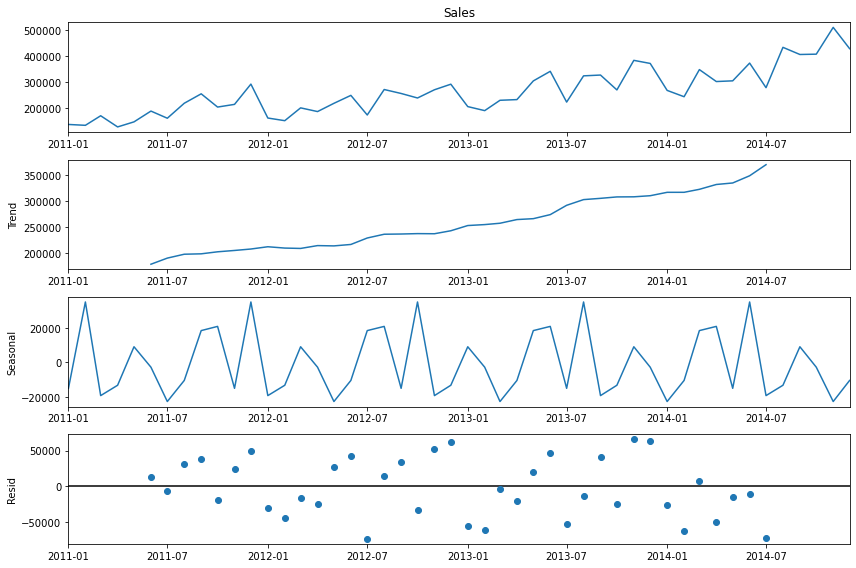

In [24]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(ss_data1.Sales, model='additive',freq = 10) # additive seasonal index
fig = decomposition.plot()
plt.show()


### b) Multiplicative seasonal decomposition:

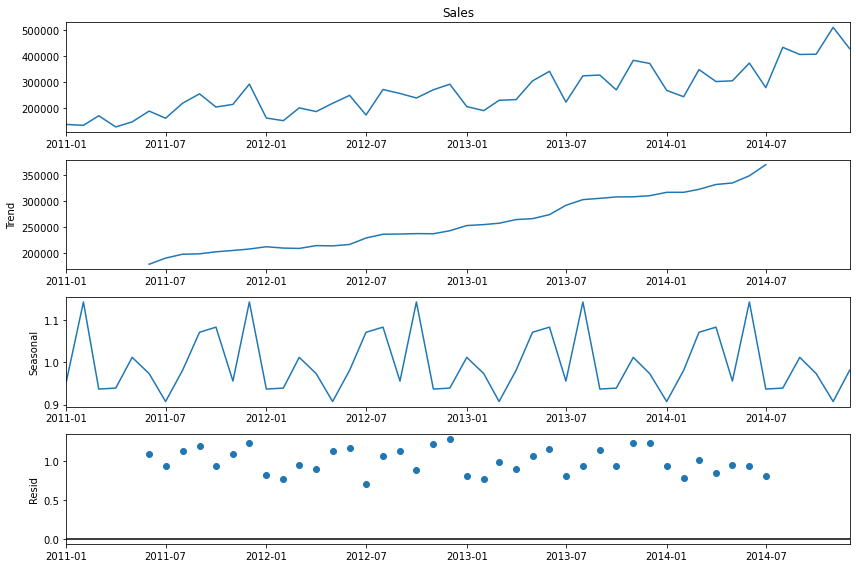

In [25]:
decomposition = sm.tsa.seasonal_decompose(ss_data1.Sales, model='multiplicative',freq=10) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

#### From the above decompostion we can see three components. They are "Trend component", "Seasonal component" and "Residual component (noise)".

### Split time series data into training and test set

In [26]:
train_len2 = 42
train2 = ss_data1[:train_len2] # first 42 months as training set
test2 = ss_data1[train_len2:] # lastt 6 months as testing set

In [27]:
train2.shape

(42, 1)

In [28]:
test2.shape

(6, 1)

## 2. Exponential smoothing methods:

### a) Simple exponential smoothing:

In [29]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train2['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test2.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

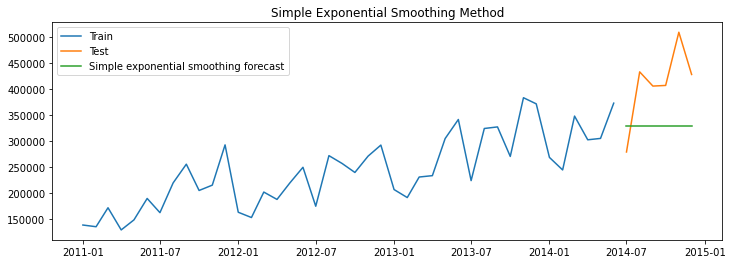

In [30]:
plt.figure(figsize=(12,4))
plt.plot(train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate MAPE

In [31]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_ses['ses_forecast'])/test2['Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing method'],'MAPE': [mape] })
results

,Method,MAPE
0,Simple exponential smoothing method,23.17


### b) Holt's method with trend:

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train2['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test2.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test2))

{'smoothing_level': 0.21714285714285714, 'smoothing_trend': 0.09771428571428571, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 138241.30041999975, 'initial_trend': -3271.359559999779, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

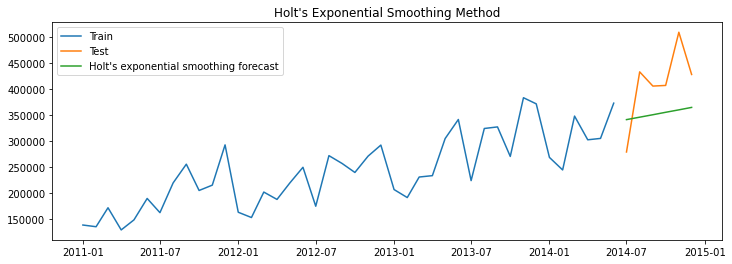

In [33]:
plt.figure(figsize=(12,4))
plt.plot( train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate MAPE

In [34]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_holt['holt_forecast'])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,23.17
0,Holt's exponential smoothing method,18.82


### c) Holt Winters' additive method with trend and seasonality:

In [35]:
y_hat_hwa = test2.copy()
model = ExponentialSmoothing(np.asarray(train2['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.1817857142857143, 'smoothing_trend': 9.999999999999999e-05, 'smoothing_seasonal': 0.6923351648351648, 'damping_trend': nan, 'initial_level': 193941.72800499998, 'initial_trend': 2902.6930476388857, 'initial_seasons': array([-55700.427585, -58971.787145, -22486.134285, -65108.257665,
       -45795.007085,  -4603.288345, -31907.030445,  25281.767235,
        61296.168975,  10733.350455,  20992.565855,  98418.239515]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

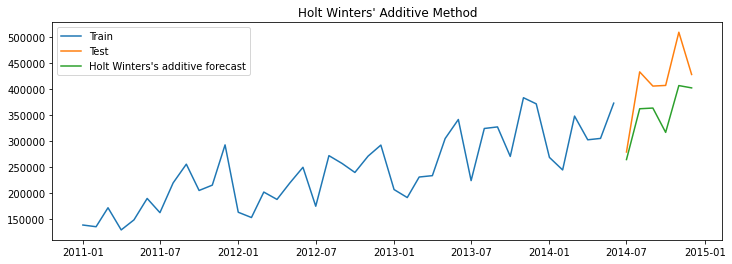

In [36]:
plt.figure(figsize=(12,4))
plt.plot( train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate MAPE

In [37]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_hwa['hw_forecast'])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method','MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,23.17
0,Holt's exponential smoothing method,18.82
0,Holt Winters' additive method,13.40


### d) Holt Winter's multiplicative method with trend and seasonality

In [38]:
y_hat_hwm = test2.copy()
model = ExponentialSmoothing(np.asarray(train2['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.14642857142857144, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.7550824175824176, 'damping_trend': nan, 'initial_level': 193941.72800499998, 'initial_trend': 2902.6930476388857, 'initial_seasons': array([0.71279813, 0.69593038, 0.88405727, 0.66428959, 0.76387234,
       0.97626458, 0.83548135, 1.13035754, 1.31605457, 1.05534317,
       1.10824161, 1.50746294]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

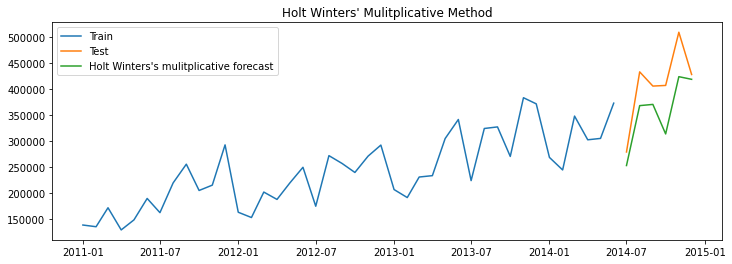

In [39]:
plt.figure(figsize=(12,4))
plt.plot( train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate MAPE

In [40]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_hwm['hw_forecast'])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,23.17
0,Holt's exponential smoothing method,18.82
0,Holt Winters' additive method,13.40
0,Holt Winters' multiplicative method,12.49


#### In the smoothing techniques 'Holt Winters multiplicative' forecast is able to predict the sales closer to the actual values and has the lowest MAPE value  among all the methods done above.

## 3. Auto Regressive methods:

### a) Stationary tests:

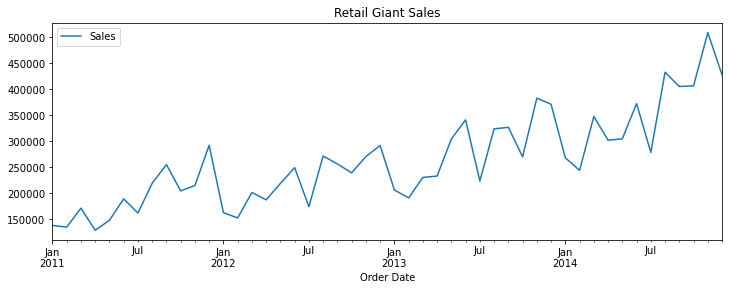

In [41]:
ss_data1['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [42]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(ss_data1['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.046292
Critical Values @ 0.05: -2.93
p-value: 0.962197


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [43]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(ss_data1['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.583940
Critical Values @ 0.05: 0.46
p-value: 0.024096


#### As per the 'p' values from the above two stationary tests we can infer that the series is not stationary.

## b) Conversion of Non-Stationary to Stationary

### Box Cox transformation to make variance constant

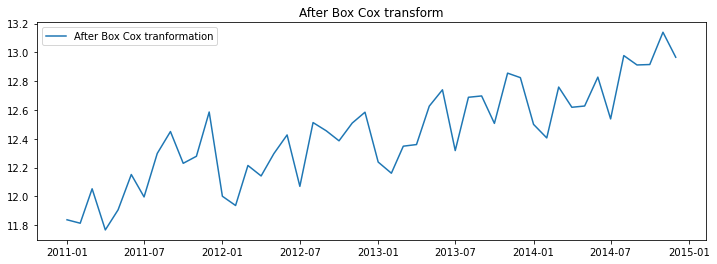

In [44]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(ss_data1['Sales'], lmbda=0), index = ss_data1.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

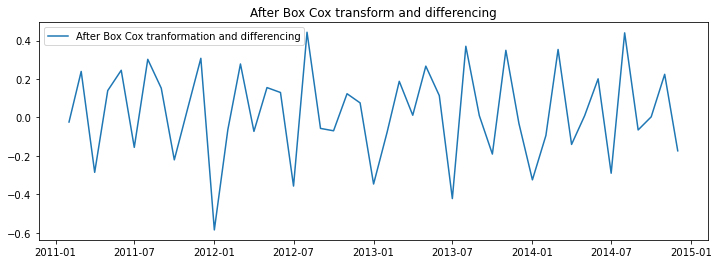

In [45]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), ss_data1.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [46]:
data_boxcox_diff.dropna(inplace=True)

In [47]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.440080
2014-09-01   -0.065152
2014-10-01    0.003011
2014-11-01    0.224383
2014-12-01   -0.173803
dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [48]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -9.208309
Critical Values @ 0.05: -2.95
p-value: 0.000000


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [49]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.124686
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


#### As per the 'p' values from the above stationary tests we can infer that the series is stationary.

### Splitting the Boxcox transformed data

In [50]:
train_data_boxcox = data_boxcox[:train_len2]
test_data_boxcox = data_boxcox[train_len2:]
train_data_boxcox_diff = data_boxcox_diff[:train_len2-1]
test_data_boxcox_diff = data_boxcox_diff[train_len2-1:]

In [51]:
train_data_boxcox_diff

Order Date
2011-02-01   -0.023949
2011-03-01    0.239272
2011-04-01   -0.285804
2011-05-01    0.139682
2011-06-01    0.245333
2011-07-01   -0.155726
2011-08-01    0.302281
2011-09-01    0.152104
2011-10-01   -0.220772
2011-11-01    0.048909
2011-12-01    0.307653
2012-01-01   -0.585458
2012-02-01   -0.064307
2012-03-01    0.278108
2012-04-01   -0.072710
2012-05-01    0.155271
2012-06-01    0.129726
2012-07-01   -0.357299
2012-08-01    0.443270
2012-09-01   -0.057194
2012-10-01   -0.069587
2012-11-01    0.123290
2012-12-01    0.075563
2013-01-01   -0.346556
2013-02-01   -0.077501
2013-03-01    0.187856
2013-04-01    0.011358
2013-05-01    0.266887
2013-06-01    0.113655
2013-07-01   -0.422309
2013-08-01    0.370313
2013-09-01    0.009283
2013-10-01   -0.190773
2013-11-01    0.349264
2013-12-01   -0.031274
2014-01-01   -0.324886
2014-02-01   -0.094156
2014-03-01    0.353579
2014-04-01   -0.140535
2014-05-01    0.008786
2014-06-01    0.200792
dtype: float64

## c) Auto regression method (AR):

In [52]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.023325
ar.L1.y   -0.369188
dtype: float64


C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series

In [53]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

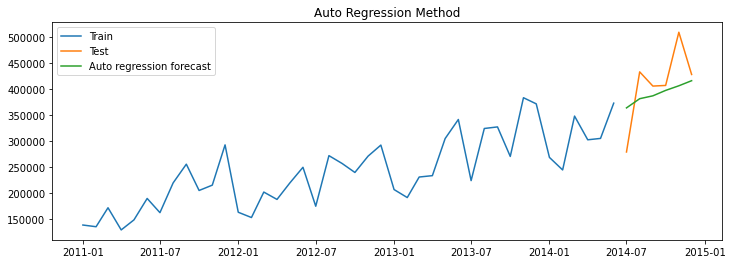

In [54]:
plt.figure(figsize=(12,4))
plt.plot(train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test2.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate MAPE

In [55]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_ar['ar_forecast'][test2.index.min():])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,23.17
0,Holt's exponential smoothing method,18.82
0,Holt Winters' additive method,13.40
0,Holt Winters' multiplicative method,12.49
0,Autoregressive (AR) method,12.06


## d) Moving average method (MA):

In [56]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.019228
ma.L1.y   -0.999926
dtype: float64


C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series

In [57]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

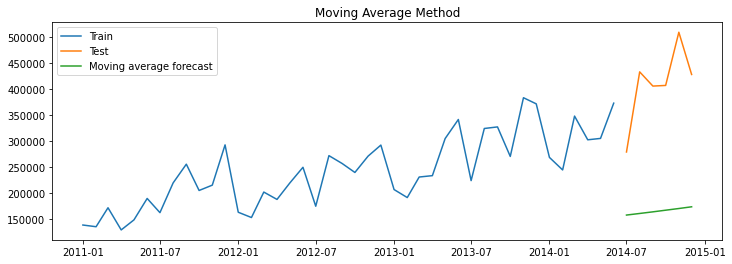

In [58]:
plt.figure(figsize=(12,4))
plt.plot(train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test2.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate MAPE

In [59]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_ma['ma_forecast'][test2.index.min():])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,23.17
0,Holt's exponential smoothing method,18.82
0,Holt Winters' additive method,13.40
0,Holt Winters' multiplicative method,12.49
0,Autoregressive (AR) method,12.06
0,Moving Average (MA) method,58.53


## e) Auto regression moving average method (ARMA):

In [60]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.019326
ar.L1.y    0.124058
ma.L1.y   -0.999908
dtype: float64


C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series

In [61]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

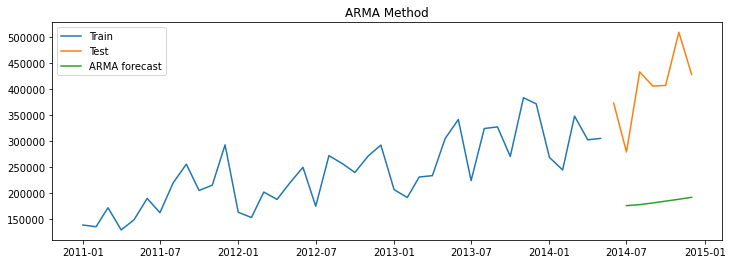

In [62]:
plt.figure(figsize=(12,4))
plt.plot( ss_data1['Sales'][:train_len-1], label='Train')
plt.plot(ss_data1['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test2.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate MAPE

In [63]:
#rmse = np.sqrt(mean_squared_error(test2['Sales'], y_hat_arma['arma_forecast'][train_len2-1:])).round(2)
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_arma['arma_forecast'][train_len2-1:])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,23.17
0,Holt's exponential smoothing method,18.82
0,Holt Winters' additive method,13.40
0,Holt Winters' multiplicative method,12.49
0,Autoregressive (AR) method,12.06
0,Moving Average (MA) method,58.53
0,Autoregressive moving average (ARMA) method,54.08


## f) Auto regressive integrated moving average (ARIMA):

In [64]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)


const        0.019326
ar.L1.D.y    0.124058
ma.L1.D.y   -0.999908
dtype: float64


C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Recover original time series forecast

In [65]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

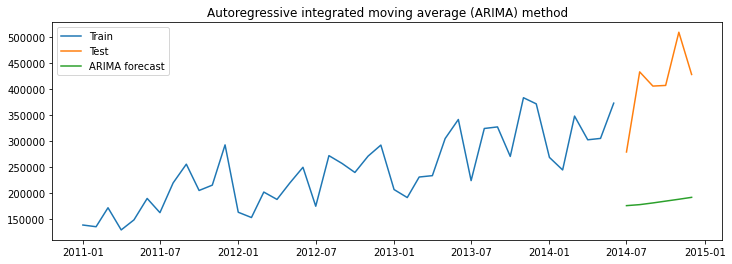

In [66]:
plt.figure(figsize=(12,4))
plt.plot(train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test2.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate MAPE

In [67]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_arima['arima_forecast'][test2.index.min():])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,23.17
0,Holt's exponential smoothing method,18.82
0,Holt Winters' additive method,13.40
0,Holt Winters' multiplicative method,12.49
0,Autoregressive (AR) method,12.06
0,Moving Average (MA) method,58.53
0,Autoregressive moving average (ARMA) method,54.08
0,Autoregressive integrated moving average (ARIM...,54.08


## g) Seasonal auto regressive integrated moving average (SARIMA):

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\prade\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1       0.206822
ma.L1      -0.993560
ar.S.L12    0.484093
ma.S.L12   -0.947126
sigma2      0.009091
dtype: float64


### Recover original time series forecast

In [69]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

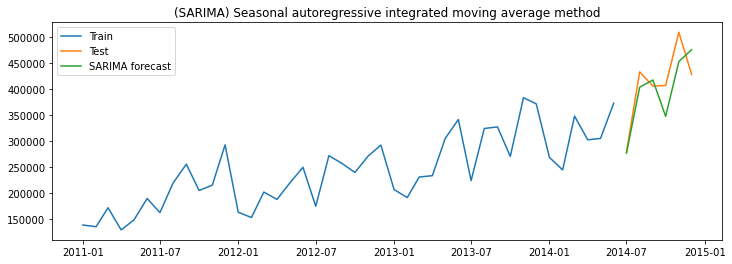

In [70]:
plt.figure(figsize=(12,4))
plt.plot(train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test2.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('(SARIMA) Seasonal autoregressive integrated moving average method')
plt.show()

### Calculate MAPE

In [71]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_sarima['sarima_forecast'][test2.index.min():])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal autoregressive integrated moving average method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method','MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,23.17
0,Holt's exponential smoothing method,18.82
0,Holt Winters' additive method,13.40
0,Holt Winters' multiplicative method,12.49
0,Autoregressive (AR) method,12.06
0,Moving Average (MA) method,58.53
0,Autoregressive moving average (ARMA) method,54.08
0,Autoregressive integrated moving average (ARIM...,54.08
0,(SARIMA) Seasonal autoregressive integrated mo...,7.89


#### In the Auto Regressive techniques 'SARIMA' forecast is able to predict the sales closer to the actual values and has the lowest MAPE value  among all the methods done above.

### 4) Conclusion:

#### “Holts’s winter method” in case of smoothing techniques whereas “SARIMA”  in case of Auto Regressive methods. 
#### Between “Holt’s winter method” and “SARIMA” methods , “SARIMA” is the best for the sales forecast as it has low MAPE value compared to “Holt’s winter method”.